<a href="https://colab.research.google.com/github/19marquee/rabbit-challenge/blob/main/deep-learning/day2section3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# レポート 深層学習day2/Section3:過学習


## 100文字以内の要点のまとめ


- 過学習：訓練誤差とテスト誤差とで学習曲線が乖離すること。
- 過学習の原因として、学習条件、設定に対して、ネットワークの自由度（総数、ノード数、パラメータの値など）が高すぎる、ということが考えられる。
- 正則化：ネットワークの自由度を制限して過学習を回避すること。
- 荷重減衰：誤差に対して、正則化項を加算することで、重みが極端な大きさにならないように抑制する。L1正則化、L2正則化
- ドロップアウト：ランダムにノードを削除して学習させること。

## 実装演習結果

#### 準備

#### Googleドライブのマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [2]:
import sys
sys.path.append('/content/drive/My Drive/DNN_code')
sys.path.append('/content/drive/My Drive/DNN_code/lesson_2')

#### overfiting

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.15666666666666668
                : 10. 正答率(テスト) = 0.1471
Generation: 20. 正答率(トレーニング) = 0.31333333333333335
                : 20. 正答率(テスト) = 0.2256
Generation: 30. 正答率(トレーニング) = 0.39
                : 30. 正答率(テスト) = 0.2881
Generation: 40. 正答率(トレーニング) = 0.48
                : 40. 正答率(テスト) = 0.3586
Generation: 50. 正答率(トレーニング) = 0.5133333333333333
                : 50. 正答率(テスト) = 0.3729
Generation: 60. 正答率(トレーニング) = 0.5466666666666666
                : 60. 正答率(テスト) = 0.4209
Generation: 70. 正答率(トレーニング) = 0.6133333333333333
                : 70. 正答率(テスト) = 0.4729
Generation: 80. 正答率(トレーニング) = 0.66
                : 80. 正答率(テスト) = 0.5011
Generation: 90. 正答率(トレーニング) = 0.7466666666666667
                : 90. 正答率(テスト) = 0.5515
Generation: 100. 正答率(トレーニング) = 0.8066666666666666
                : 100. 正答率(テスト) = 0.606
Generation: 110. 正答率(トレーニング) = 0.8233333333333334
                : 110. 正答率(テスト) = 0.618
Generation: 120. 正答率(トレーニング) = 0.8466666666666667

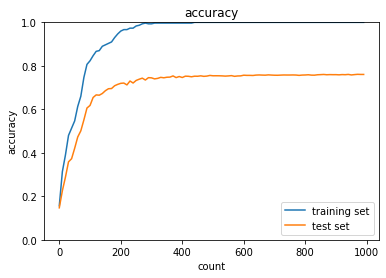

In [3]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer


(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

#### weight decay
#### L2

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.25
                : 10. 正答率(テスト) = 0.151
Generation: 20. 正答率(トレーニング) = 0.3566666666666667
                : 20. 正答率(テスト) = 0.2017
Generation: 30. 正答率(トレーニング) = 0.4533333333333333
                : 30. 正答率(テスト) = 0.2742
Generation: 40. 正答率(トレーニング) = 0.48
                : 40. 正答率(テスト) = 0.3283
Generation: 50. 正答率(トレーニング) = 0.5266666666666666
                : 50. 正答率(テスト) = 0.3708
Generation: 60. 正答率(トレーニング) = 0.5533333333333333
                : 60. 正答率(テスト) = 0.3896
Generation: 70. 正答率(トレーニング) = 0.5933333333333334
                : 70. 正答率(テスト) = 0.4216
Generation: 80. 正答率(トレーニング) = 0.6466666666666666
                : 80. 正答率(テスト) = 0.4589
Generation: 90. 正答率(トレーニング) = 0.65
                : 90. 正答率(テスト) = 0.4654
Generation: 100. 正答率(トレーニング) = 0.6833333333333333
                : 100. 正答率(テスト) = 0.5043
Generation: 110. 正答率(トレーニング) = 0.7033333333333334
                : 110. 正答率(テスト) = 0.5159
Generation: 120. 正答率(トレーニング) = 0.7266666666666667


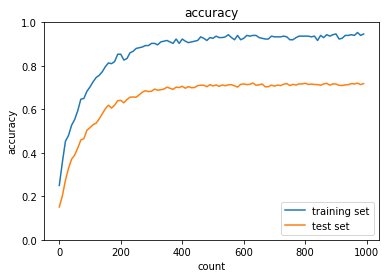

In [4]:
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.1
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

#### L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.3233333333333333
                : 10. 正答率(テスト) = 0.2397
Generation: 20. 正答率(トレーニング) = 0.5633333333333334
                : 20. 正答率(テスト) = 0.4441
Generation: 30. 正答率(トレーニング) = 0.52
                : 30. 正答率(テスト) = 0.4108
Generation: 40. 正答率(トレーニング) = 0.5
                : 40. 正答率(テスト) = 0.4232
Generation: 50. 正答率(トレーニング) = 0.7666666666666667
                : 50. 正答率(テスト) = 0.5874
Generation: 60. 正答率(トレーニング) = 0.7966666666666666
                : 60. 正答率(テスト) = 0.6066
Generation: 70. 正答率(トレーニング) = 0.7666666666666667
                : 70. 正答率(テスト) = 0.6103
Generation: 80. 正答率(トレーニング) = 0.6066666666666667
                : 80. 正答率(テスト) = 0.4691
Generation: 90. 正答率(トレーニング) = 0.9633333333333334
                : 90. 正答率(テスト) = 0.7668
Generation: 100. 正答率(トレーニング) = 0.9466666666666667
                : 100. 正答率(テスト) = 0.7689
Generation: 110. 正答率(トレーニング) = 0.7866666666666666
                : 110. 正答率(テスト) = 0.6217
Generation: 120. 正答率(トレーニング) = 0.57


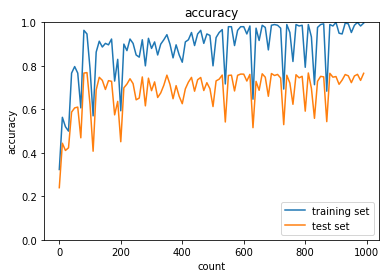

In [5]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.005
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------
## [try] weigth_decay_lambdaの値を変更して正則化の強さを確認しよう
----------------------------------------------------------------------------------------------------------------------------------------

正則化強度を0.005から0.05に変更

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.39666666666666667
                : 10. 正答率(テスト) = 0.2878
Generation: 20. 正答率(トレーニング) = 0.13
                : 20. 正答率(テスト) = 0.1135
Generation: 30. 正答率(トレーニング) = 0.13
                : 30. 正答率(テスト) = 0.1135
Generation: 40. 正答率(トレーニング) = 0.13
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.13
                : 50. 正答率(テスト) = 0.1135
Generation: 60. 正答率(トレーニング) = 0.13
                : 60. 正答率(テスト) = 0.1135
Generation: 70. 正答率(トレーニング) = 0.13
                : 70. 正答率(テスト) = 0.1135
Generation: 80. 正答率(トレーニング) = 0.13
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.13
                : 90. 正答率(テスト) = 0.1135
Generation: 100. 正答率(トレーニング) = 0.13
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.13
                : 110. 正答率(テスト) = 0.1135
Generation: 120. 正答率(トレーニング) = 0.13
                : 120. 正答率(テスト) = 0.1135
Generation: 130. 正答率(トレーニング) = 0.13
                : 130. 正答率(テスト) =

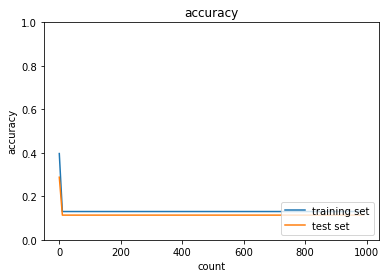

In [7]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.05
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

#### Dropout

In [8]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.06
                : 10. 正答率(テスト) = 0.0805
Generation: 20. 正答率(トレーニング) = 0.06333333333333334
                : 20. 正答率(テスト) = 0.0815
Generation: 30. 正答率(トレーニング) = 0.07666666666666666
                : 30. 正答率(テスト) = 0.0889
Generation: 40. 正答率(トレーニング) = 0.11666666666666667
                : 40. 正答率(テスト) = 0.0987
Generation: 50. 正答率(トレーニング) = 0.14
                : 50. 正答率(テスト) = 0.1126
Generation: 60. 正答率(トレーニング) = 0.15666666666666668
                : 60. 正答率(テスト) = 0.1269
Generation: 70. 正答率(トレーニング) = 0.19333333333333333
                : 70. 正答率(テスト) = 0.1427
Generation: 80. 正答率(トレーニング) = 0.2
                : 80. 正答率(テスト) = 0.1533
Generation: 90. 正答率(トレーニング) = 0.24
                : 90. 正答率(テスト) = 0.1683
Generation: 100. 正答率(トレーニング) = 0.2633333333333333
                : 100. 正答率(テスト) = 0.1809
Generation: 110. 正答率(トレーニング) = 0.27
                : 110. 正答率(テスト) = 0.1911
Generation: 120. 正答率(トレーニング) = 0.3
                : 120. 正答率(テスト) = 0.20

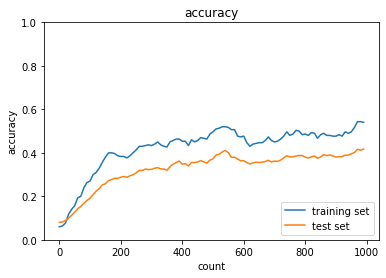

In [9]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] dropout_ratioの値を変更してみよう

ドロップアウト率を0.15から0.1に変更

Generation: 10. 正答率(トレーニング) = 0.32
                : 10. 正答率(テスト) = 0.2745
Generation: 20. 正答率(トレーニング) = 0.6266666666666667
                : 20. 正答率(テスト) = 0.5349
Generation: 30. 正答率(トレーニング) = 0.8466666666666667
                : 30. 正答率(テスト) = 0.6967
Generation: 40. 正答率(トレーニング) = 0.9166666666666666
                : 40. 正答率(テスト) = 0.7325
Generation: 50. 正答率(トレーニング) = 0.96
                : 50. 正答率(テスト) = 0.7743
Generation: 60. 正答率(トレーニング) = 0.9933333333333333
                : 60. 正答率(テスト) = 0.7769
Generation: 70. 正答率(トレーニング) = 0.9966666666666667
                : 70. 正答率(テスト) = 0.7851
Generation: 80. 正答率(トレーニング) = 1.0
                : 80. 正答率(テスト) = 0.7946
Generation: 90. 正答率(トレーニング) = 1.0
                : 90. 正答率(テスト) = 0.8002
Generation: 100. 正答率(トレーニング) = 1.0
                : 100. 正答率(テスト) = 0.794
Generation: 110. 正答率(トレーニング) = 1.0
                : 110. 正答率(テスト) = 0.8075
Generation: 120. 正答率(トレーニング) = 1.0
                : 120. 正答率(テスト) = 0.7932
Generation: 130. 正答率(トレーニング) =

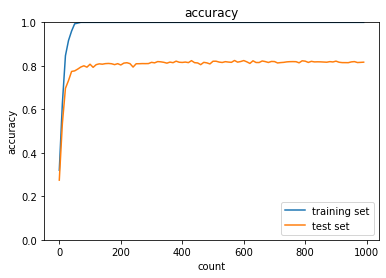

In [21]:
# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

訓練データに対するaccuracyは1に到達するが、過学習が起きている。

## [try] optimizerとdropout_ratioの値を変更してみよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------

Adamに変更

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.5933333333333334
                : 10. 正答率(テスト) = 0.4333
Generation: 20. 正答率(トレーニング) = 0.67
                : 20. 正答率(テスト) = 0.53
Generation: 30. 正答率(トレーニング) = 0.7733333333333333
                : 30. 正答率(テスト) = 0.6277
Generation: 40. 正答率(トレーニング) = 0.83
                : 40. 正答率(テスト) = 0.676
Generation: 50. 正答率(トレーニング) = 0.9066666666666666
                : 50. 正答率(テスト) = 0.7108
Generation: 60. 正答率(トレーニング) = 0.9366666666666666
                : 60. 正答率(テスト) = 0.7467
Generation: 70. 正答率(トレーニング) = 0.9666666666666667
                : 70. 正答率(テスト) = 0.7555
Generation: 80. 正答率(トレーニング) = 0.9833333333333333
                : 80. 正答率(テスト) = 0.7781
Generation: 90. 正答率(トレーニング) = 0.9933333333333333
                : 90. 正答率(テスト) = 0.7834
Generation: 100. 正答率(トレーニング) = 0.9933333333333333
                : 100. 正答率(テスト) = 0.7768
Generation: 110. 正答率(トレーニング) = 0.9966666666666667
                : 110. 正答率(テスト) = 0.7735
Generation: 120. 正答率(トレーニング) = 1.0
   

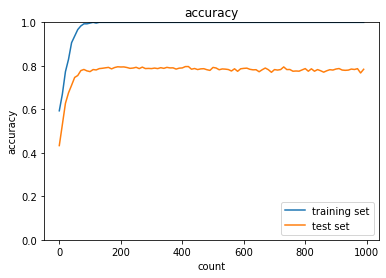

In [18]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
#optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

最適化手法をAdamに変えても過学習が起きてしまう。

## Dropout + L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.06666666666666667
                : 10. 正答率(テスト) = 0.1012
Generation: 20. 正答率(トレーニング) = 0.11
                : 20. 正答率(テスト) = 0.1282
Generation: 30. 正答率(トレーニング) = 0.17666666666666667
                : 30. 正答率(テスト) = 0.1642
Generation: 40. 正答率(トレーニング) = 0.21333333333333335
                : 40. 正答率(テスト) = 0.1986
Generation: 50. 正答率(トレーニング) = 0.27
                : 50. 正答率(テスト) = 0.2292
Generation: 60. 正答率(トレーニング) = 0.32
                : 60. 正答率(テスト) = 0.2524
Generation: 70. 正答率(トレーニング) = 0.34
                : 70. 正答率(テスト) = 0.2655
Generation: 80. 正答率(トレーニング) = 0.3933333333333333
                : 80. 正答率(テスト) = 0.2984
Generation: 90. 正答率(トレーニング) = 0.39
                : 90. 正答率(テスト) = 0.3117
Generation: 100. 正答率(トレーニング) = 0.4
                : 100. 正答率(テスト) = 0.3252
Generation: 110. 正答率(トレーニング) = 0.42
                : 110. 正答率(テスト) = 0.3248
Generation: 120. 正答率(トレーニング) = 0.4166666666666667
                : 120. 正答率(テスト) = 0.3307
Generation: 

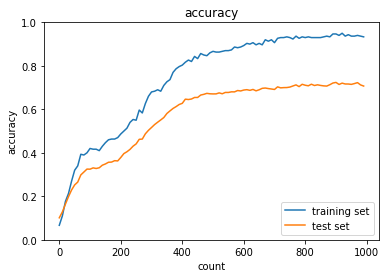

In [16]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.08
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []
hidden_layer_num = network.hidden_layer_num

plot_interval=10

# 正則化強度設定 ======================================
weight_decay_lambda=0.004
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

グラフから、訓練データの正解率とテストデータの正解率の乖離が確認できる。過学習が起きていることが分かる。

##確認テスト

・機械学習で使われる線形モデル(線形回帰、主成分分析等)の正則化は、モデルの重みを制限することで可能となる。
前述の線形モデルの正則化手法の中にリッジ回帰という手法があり、その特徴として正しいものを選択しなさい。  

(a) ハイパーパラメータを大きな値に設定すると、すべての重みが限りなく0に近づく  
(b) パイパーパラメータを 0 に設定すると、非線形回帰となる  
(c) バイアス項についても、正則化される  
(d) リッジ回帰の場合、隠れ層に対して正則化項を加える  


解答  

(a)

・下図について、L1正則化を表しているグラフはどちらか答えよ。  

　　　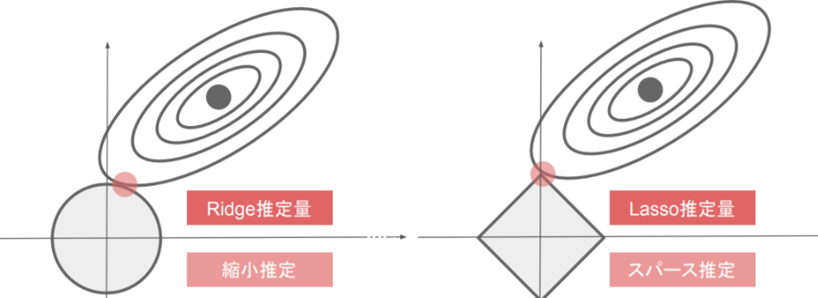

解答  

L1正則化を表しているグラフは 右のLasso推定量である。